In [1]:
import tensorflow_hub as hub
model1 = hub.load("https://www.kaggle.com/models/rishitdagli/plant-disease/TensorFlow2/plant-disease/1")


### This is an application of ML so we will try to import different models which can dectect diseases in plants .
The classes are,
* 1.Apple_scab
* 2.Apple_black_rot
* 3.Apple_cedar_apple_rust
* 4.Apple_healthy
* 5.Background_without_leaves
* 6.Blueberry_healthy
* 7.Cherry_powdery_mildew
* 8.Cherry_healthy
* 9.Corn_gray_leaf_spot
* 10.Corn_common_rust
* 11.Corn_northern_leaf_blight
* 12.Corn_healthy
* 13.Grape_black_rot
* 14.Grape_black_measles
* 15.Grape_leaf_blight
* 16.Grape_healthy
* 17.Orange_haunglongbing
* 18.Peach_bacterial_spot
* 19.Peach_healthy
* 20.Pepper_bacterial_spot
* 21.Pepper_healthy
* 22.Potato_early_blight
* 23.Potato_healthy
* 24.Potato_late_blight
* 25.Raspberry_healthy
* 26.Soybean_healthy
* 27.Squash_powdery_mildew
* 28.Strawberry_healthy
* 29.Strawberry_leaf_scorch
* 30.Tomato_bacterial_spot
* 31.Tomato_early_blight
* 32.Tomato_healthy
* 33.Tomato_late_blight
* 34.Tomato_leaf_mold
* 35.Tomato_septoria_leaf_spot
* 36.Tomato_spider_mites_two-spotted_spider_mite
* 37.Tomato_target_spot
* 38.Tomato_mosaic_virus
* 39.Tomato_yellow_leaf_curl_virus

Many of the above are cultivated in India
except maybe blueberries and cherries


In [4]:
image_path = ".\test diseases\AppleCedarRust1.JPG"

In [16]:
from PIL import Image
import numpy as np

def preprocess_image(image_path):
    # Open the image, resize it, and normalize the pixel values
    try:
        with Image.open(image_path) as img:
            img = img.resize((224, 224))
            img_array = np.array(img).astype(np.float32) / 255.0  # Normalize to [0,1]
            img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
        return img_array
    except OSError as e:
        print(f"Error: {e}")

# Use a raw string for the file path to avoid issues with backslashes
image_path = ".\AppleCedarRust1.JPG"

# Preprocess the image
preprocessed_image = preprocess_image(image_path)


In [17]:
output = model1(preprocessed_image)


In [18]:
output

<tf.Tensor: shape=(1, 38), dtype=float32, numpy=
array([[3.9984669e-05, 1.4129741e-04, 9.9979550e-01, 1.8071319e-06,
        4.5507300e-06, 3.5599061e-09, 2.3872845e-08, 4.4695170e-10,
        2.6773644e-10, 1.1904461e-10, 2.1090438e-11, 3.0592462e-09,
        2.2575113e-09, 1.0837286e-08, 5.1982045e-07, 5.4094885e-06,
        9.5267987e-06, 2.9691826e-08, 5.2906469e-08, 6.8083615e-11,
        9.8724158e-08, 2.4186673e-07, 2.1706132e-09, 2.1985251e-10,
        2.3146454e-10, 2.7996503e-12, 1.0895776e-08, 6.1726880e-08,
        5.0224901e-07, 4.8255391e-08, 1.8637175e-08, 1.9341293e-09,
        5.0854023e-09, 7.7990425e-10, 1.3119677e-07, 2.9886312e-08,
        2.4630707e-11, 1.4150022e-08]], dtype=float32)>

In [19]:
import json
import requests

# Load class labels from the provided URL
url = "https://github.com/Rishit-dagli/Greenathon-Plant-AI/releases/download/v0.1.0/class_indices.json"
response = requests.get(url)
class_indices = response.json()

# Print the class_indices to inspect its structure
print(class_indices)


{'0': 'Apple___Apple_scab', '1': 'Apple___Black_rot', '2': 'Apple___Cedar_apple_rust', '3': 'Apple___healthy', '4': 'Blueberry___healthy', '5': 'Cherry_(including_sour)___Powdery_mildew', '6': 'Cherry_(including_sour)___healthy', '7': 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', '8': 'Corn_(maize)___Common_rust_', '9': 'Corn_(maize)___Northern_Leaf_Blight', '10': 'Corn_(maize)___healthy', '11': 'Grape___Black_rot', '12': 'Grape___Esca_(Black_Measles)', '13': 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', '14': 'Grape___healthy', '15': 'Orange___Haunglongbing_(Citrus_greening)', '16': 'Peach___Bacterial_spot', '17': 'Peach___healthy', '18': 'Pepper_bell___Bacterial_spot', '19': 'Pepper_bell___healthy', '20': 'Potato___Early_blight', '21': 'Potato___Late_blight', '22': 'Potato___healthy', '23': 'Raspberry___healthy', '24': 'Soybean___healthy', '25': 'Squash___Powdery_mildew', '26': 'Strawberry___Leaf_scorch', '27': 'Strawberry___healthy', '28': 'Tomato___Bacterial_spot', '29': 'T

In [20]:
# Create a mapping from index to class label
index_to_class = {k: v for k, v in class_indices.items()}

# Print the corrected mapping
print(f"Loaded {len(index_to_class)} class labels.")



Loaded 38 class labels.


In [21]:
index_to_class

{'0': 'Apple___Apple_scab',
 '1': 'Apple___Black_rot',
 '2': 'Apple___Cedar_apple_rust',
 '3': 'Apple___healthy',
 '4': 'Blueberry___healthy',
 '5': 'Cherry_(including_sour)___Powdery_mildew',
 '6': 'Cherry_(including_sour)___healthy',
 '7': 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 '8': 'Corn_(maize)___Common_rust_',
 '9': 'Corn_(maize)___Northern_Leaf_Blight',
 '10': 'Corn_(maize)___healthy',
 '11': 'Grape___Black_rot',
 '12': 'Grape___Esca_(Black_Measles)',
 '13': 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 '14': 'Grape___healthy',
 '15': 'Orange___Haunglongbing_(Citrus_greening)',
 '16': 'Peach___Bacterial_spot',
 '17': 'Peach___healthy',
 '18': 'Pepper_bell___Bacterial_spot',
 '19': 'Pepper_bell___healthy',
 '20': 'Potato___Early_blight',
 '21': 'Potato___Late_blight',
 '22': 'Potato___healthy',
 '23': 'Raspberry___healthy',
 '24': 'Soybean___healthy',
 '25': 'Squash___Powdery_mildew',
 '26': 'Strawberry___Leaf_scorch',
 '27': 'Strawberry___healthy',
 '28': 'Tomato

In [26]:
import tensorflow as tf
import numpy as np

# Run inference
output = model1(preprocessed_image)

# Convert logits to probabilities using softmax
probabilities = tf.nn.softmax(output, axis=-1).numpy()

# Get the index of the highest probability
predicted_index = np.argmax(probabilities, axis=1)[0]

# Check if the predicted index is in the index_to_class dictionary
predicted_index = str(predicted_index)
if predicted_index in index_to_class:
    predicted_label = index_to_class[predicted_index]
    predicted_class, predicted_disease = predicted_label.split('___')
    print(f"Predicted class: {predicted_class}")
    print(f"Predicted disease: {predicted_disease}")
else:
    print(f"Predicted index {predicted_index} not found in class mapping.")



Predicted class: Apple
Predicted disease: Cedar_apple_rust


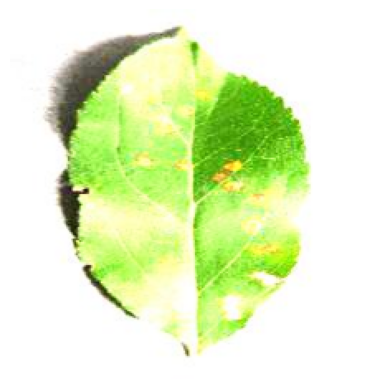

In [27]:
import matplotlib.pyplot as plt
if preprocessed_image is not None:
    # Remove the batch dimension for display
    image_to_display = preprocessed_image[0]

    # Show the image
    plt.imshow(image_to_display)
    plt.axis('off')  # Turn off axis
    plt.show()

Looks like the model1 to detect the diseases in the above plant is wokring perfectly . This model has a tensorflow lite version for using with 
raspberry pi

Now for pests detection we will use a kaggle model


In [29]:
!kaggle kernels output vencerlanz09/pests-classification-using-efficientnetv2-l -p ./data/

Output file downloaded to ./data/__pycache__/helper_functions.cpython-37.pyc
Output file downloaded to ./data/cam.jpg
Output file downloaded to ./data/checkpoint
Output file downloaded to ./data/helper_functions.py
Output file downloaded to ./data/pests_cats_classification_model_checkpoint.data-00000-of-00001
Output file downloaded to ./data/pests_cats_classification_model_checkpoint.index
Output file downloaded to ./data/temp_file_name.jpeg
Output file downloaded to ./data/training_logs/pests_cats_classification/20230324-050550/train/events.out.tfevents.1679634350.d98b1688b2f1.23.0.v2
Output file downloaded to ./data/training_logs/pests_cats_classification/20230324-050550/validation/events.out.tfevents.1679634414.d98b1688b2f1.23.1.v2
Kernel log downloaded to ./data/pests-classification-using-efficientnetv2-l.log 
